# EXPLORATORY DATA ANALYSIS ON CENSUS DATA

------

<b>Importing Libraries</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<b>Loading Census Dataset

In [2]:
columns = ["Age","Workclass","Education","Marital Status","Occupation","Relationship","Race","Gender","Hours-Per-Week","Native-Country","Income"]
data = pd.read_csv("census_data.csv")
data.columns = columns
data.head(17)

,Age,Workclass,Education,Marital Status,Occupation,Relationship,Race,Gender,Hours-Per-Week,Native-Country,Income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
5,37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
6,49,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,16,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K
8,31,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,50,United-States,>50K
9,42,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,>50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 11 columns):
Age               32561 non-null int64
Workclass         32561 non-null object
Education         32561 non-null object
Marital Status    32561 non-null object
Occupation        32561 non-null object
Relationship      32561 non-null object
Race              32561 non-null object
Gender            32561 non-null object
Hours-Per-Week    32561 non-null int64
Native-Country    32561 non-null object
Income            32561 non-null object
dtypes: int64(2), object(9)
memory usage: 2.7+ MB


In [4]:
data.shape

(32561, 11)

<b>Some Preprocessing On Data

There are some data fields having ? as a missing value, so we are up to drop all such rows that contain at least a missing value. 

In [5]:
for i in data.columns:
    data[i] = data[i].replace(" ?",np.nan)

In [6]:
data.dropna(inplace=True)

In [7]:
data.shape

(30162, 11)

In [8]:
data.reset_index(inplace=True)

In [9]:
data.drop("index",axis=1,inplace=True)
data.tail(10)

,Age,Workclass,Education,Marital Status,Occupation,Relationship,Race,Gender,Hours-Per-Week,Native-Country,Income
30152,32,Private,10th,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,40,United-States,<=50K
30153,43,Private,Assoc-voc,Married-civ-spouse,Sales,Husband,White,Male,45,United-States,<=50K
30154,32,Private,Masters,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,11,Taiwan,<=50K
30155,53,Private,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,>50K
30156,22,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,40,United-States,<=50K
30157,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
30158,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
30159,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
30160,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K
30161,52,Self-emp-inc,HS-grad,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,>50K


<b>Income Values Ratio (Entire Data)

In [10]:
data.Income.value_counts()

 <=50K    22654
 >50K      7508
Name: Income, dtype: int64

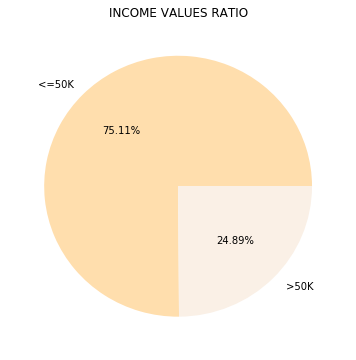

In [11]:
plt.figure(figsize=(6,6))
plt.pie(data["Income"].value_counts(), labels=data["Income"].value_counts().index, autopct="%1.2f%%", colors=["navajowhite","linen"])
plt.title("INCOME VALUES RATIO")
plt.show()

<b>Income Values Ratio (Males)

In [12]:
males = data[data["Gender"]==" Male"]

In [13]:
males.shape

(20380, 11)

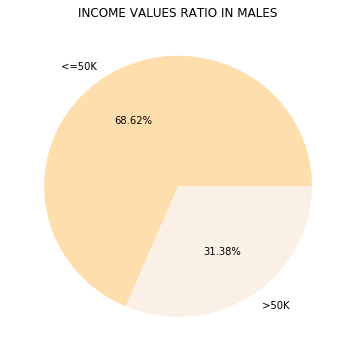

In [14]:
plt.figure(figsize=(6,6))
plt.pie(males["Income"].value_counts(), labels=males["Income"].value_counts().index, autopct="%1.2f%%", colors=["navajowhite","linen"])
plt.title("INCOME VALUES RATIO IN MALES")
plt.show()

<b>Income Values Ratio (Females)

In [15]:
females = data[data["Gender"]==" Female"]

In [16]:
females.shape

(9782, 11)

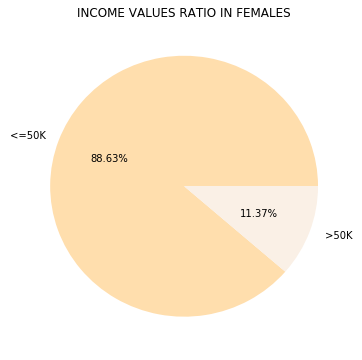

In [17]:
plt.figure(figsize=(6,6))
plt.pie(females["Income"].value_counts(), labels=females["Income"].value_counts().index, autopct="%1.2f%%", colors=["navajowhite","linen"])
plt.title("INCOME VALUES RATIO IN FEMALES")
plt.show()

<b>Average Of Age Feature (Entire Data)

In [18]:
round(data.Age.mean(),2)

38.44

<b>Average of Male Ages

In [19]:
round(males.Age.mean(),2)

39.18

<b>Average of Female Ages

In [20]:
round(females.Age.mean(),2)

36.88

<b>Ages Distributions (Entire Data)

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


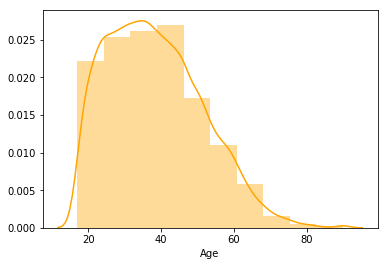

In [21]:
sns.distplot(data["Age"],bins=10, color="orange")
plt.show()

<b>Ages Distribution (Males)

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


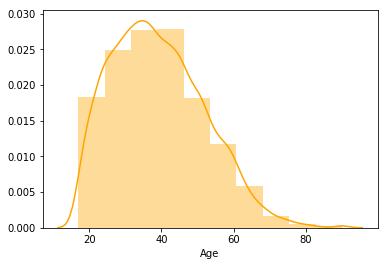

In [22]:
sns.distplot(males["Age"],bins=10, color="orange")
plt.show()

<b>Ages Distribution (Females)

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


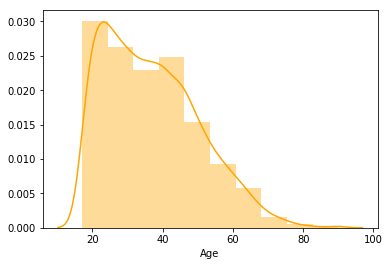

In [23]:
sns.distplot(females["Age"],bins=10, color="orange")
plt.show()

<b>Maximum & Minimum Age Of Males

In [24]:
print("Oldest Male Age: ",males.Age.max())
print("Youngest Male Age: ",males.Age.min())

Oldest Male Age:  90
Youngest Male Age:  17


<b>Maximum & Minimum Age Of Females

In [25]:
print("Oldest Female Age: ",females.Age.max())
print("Youngest Female Age: ",females.Age.min())

Oldest Female Age:  90
Youngest Female Age:  17


<b>Gender Counts (Entire Data)

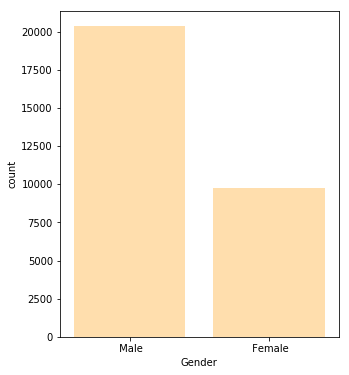

In [26]:
plt.figure(figsize=(5,6))
sns.countplot(data["Gender"], color="navajowhite",saturation=1)

<b>Occupation Counts (Entire Data)

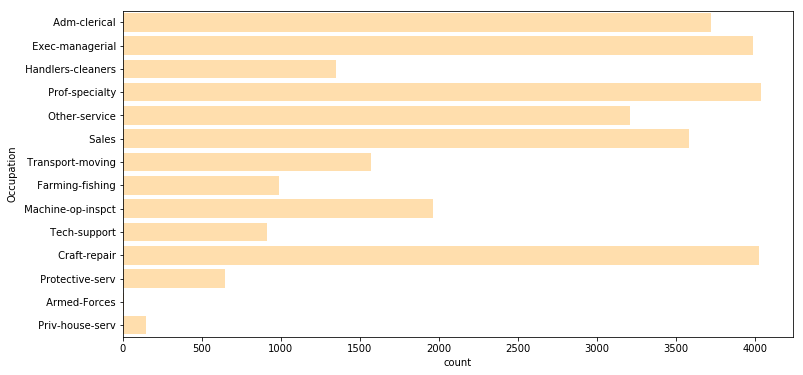

In [27]:
plt.figure(figsize=(12,6))
sns.countplot(y = data["Occupation"], color="navajowhite",saturation=1,orient="v")

<b>Native Country Counts (Entire Data) 

In [28]:
data["Native-Country"].value_counts()

 United-States                 27504
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 El-Salvador                     100
 India                           100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 Italy                            68
 China                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Columbia                         56
 Poland                           56
 Haiti                            42
 Taiwan                           42
 Iran                             42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

<b>Hours Per Week Distribution (Entire Data)

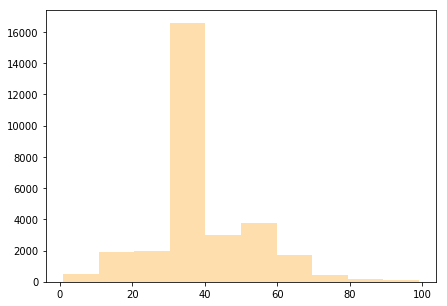

In [29]:
plt.figure(figsize=(7,5))
plt.hist(data["Hours-Per-Week"], color="navajowhite",bins=10)
plt.show()

<b>Hours Per Week Distribution (Males)

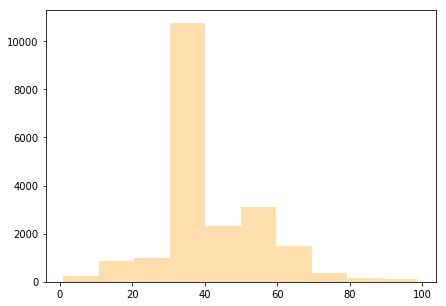

In [30]:
plt.figure(figsize=(7,5))
plt.hist(males["Hours-Per-Week"], color="navajowhite",bins=10)
plt.show()

<b>Hours Per Week Distribution (Females)

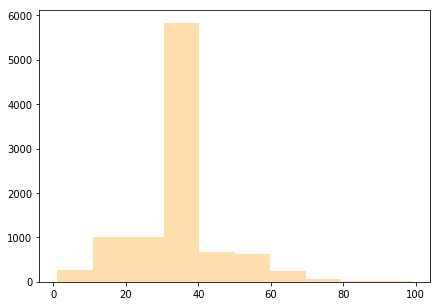

In [31]:
plt.figure(figsize=(7,5))
plt.hist(females["Hours-Per-Week"], color="navajowhite",bins=10)
plt.show()

<b>White Males vs. White Females (Ratio)

In [32]:
white = data[data["Race"]==" White"]
white.shape

(25933, 11)

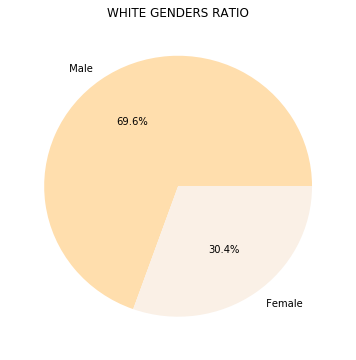

In [33]:
plt.figure(figsize=(6,6))
plt.pie(white["Gender"].value_counts(), labels=white["Gender"].value_counts().index, autopct="%1.1f%%", colors=["navajowhite","linen"])
plt.title("WHITE GENDERS RATIO")
plt.show()

<b>Male Counts With Masters Education And Income Less Than 50K

In [44]:
males_masters_less_50k = males[(males['Education']==' Masters') & (males['Income']==' <=50K')]

In [46]:
males_masters_less_50k.head(10)

,Age,Workclass,Education,Marital Status,Occupation,Relationship,Race,Gender,Hours-Per-Week,Native-Country,Income
80,33,Private,Masters,Married-civ-spouse,Prof-specialty,Husband,White,Male,50,United-States,<=50K
154,46,State-gov,Masters,Widowed,Protective-serv,Unmarried,White,Male,40,United-States,<=50K
251,50,Self-emp-not-inc,Masters,Married-civ-spouse,Farming-fishing,Husband,White,Male,98,United-States,<=50K
252,27,Local-gov,Masters,Never-married,Prof-specialty,Own-child,White,Male,35,United-States,<=50K
301,76,Self-emp-not-inc,Masters,Married-civ-spouse,Craft-repair,Husband,White,Male,10,United-States,<=50K
313,49,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Male,60,United-States,<=50K
351,46,Self-emp-not-inc,Masters,Divorced,Exec-managerial,Not-in-family,White,Male,30,United-States,<=50K
396,36,Federal-gov,Masters,Never-married,Prof-specialty,Not-in-family,White,Male,40,United-States,<=50K
399,47,Local-gov,Masters,Married-civ-spouse,Prof-specialty,Husband,White,Male,40,United-States,<=50K
486,44,Self-emp-not-inc,Masters,Married-civ-spouse,Prof-specialty,Husband,White,Male,40,United-States,<=50K


In [45]:
males_masters_less_50k.shape

(372, 11)

In [47]:
print("There are ",len(males_masters_less_50k)," Males with Masters education and Income less than equal to 50k")

There are  372  Males with Masters education and Income less than equal to 50k


<b>Education Counts of Male

In [35]:
males.Education.value_counts()

 HS-grad         6734
 Some-college    4171
 Bachelors       3522
 Masters         1118
 Assoc-voc        852
 11th             677
 Assoc-acdm       613
 10th             570
 Prof-school      455
 7th-8th          425
 9th              336
 Doctorate        294
 12th             255
 5th-6th          219
 1st-4th          108
 Preschool         31
Name: Education, dtype: int64

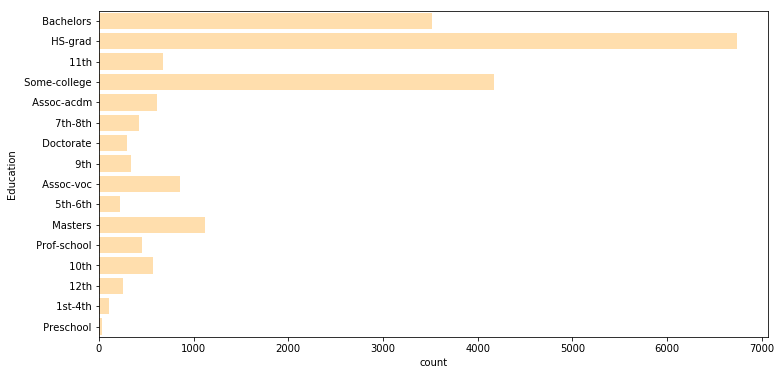

In [36]:
plt.figure(figsize=(12,6))
sns.countplot(y = males["Education"], color="navajowhite",saturation=1,orient="v")